In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_df = pd.read_json('mydata-mitbih-small.json')

In [3]:
X_data = np.array(X_df.sample(frac=1))
Y_data = X_data[:,-1]
X_data = X_data[:,:-1]

Y_data = 2.*(Y_data > 0.) - 1


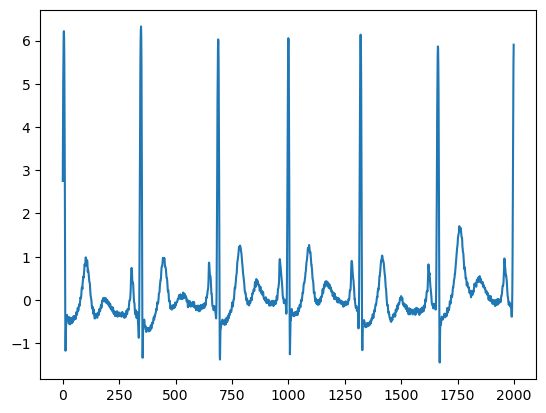

In [6]:
plt.plot(X_data[0,:])

In [5]:
import torch
from src.smk.models import SMKernelGP


In [7]:
X = torch.FloatTensor(X_data)

In [10]:
N, p = X.shape

Ntrain = int(N*0.8)
Ntest = N - Ntrain

Xtrain = X[:Ntrain]
Xtest = X[:Ntest]

In [24]:
T = torch.arange(0,1,1/p).unsqueeze(0).repeat_interleave(N,0)

In [36]:
T.shape

torch.Size([5000, 2000])

In [34]:
X.shape

torch.Size([5000, 2000])

In [26]:
smkernelgp = SMKernelGP(T,X,n_dim = p)

In [35]:
smkernelgp.predict(T)

c:\Users\aejog\anaconda3\Lib\site-packages\gpytorch\models\exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(


RuntimeError: Flattening the training labels failed. The most common cause of this error is that the shapes of the prior mean and the training labels are mismatched. The shape of the train targets is torch.Size([5000, 2000]), while the reported shape of the mean is torch.Size([5000]).

In [30]:
smkernelgp.likelihood(X[0])

Normal(loc: torch.Size([2000]), scale: torch.Size([2000]))